<h1 style="font-size:35px;
        color:black;
        ">Lab 8 Quantum Error Correction </h1>
 

Prerequisite
- [5.1 Introduction to Quantum Error Correction](https://qiskit.org/textbook/ch-quantum-hardware/error-correction-repetition-code.html#Storing-qubits)
- [3.6 Quantum Phase Estimation](https://qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html)

Other relevant materials
- [Statevector method](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html#qiskit.quantum_info.Statevector.from_instruction)
- [qsphere](https://qiskit.org/documentation/tutorials/circuits/2_plotting_data_in_qiskit.html#Plot-State)

In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_state_qsphere, plot_bloch_vector

from qiskit.quantum_info import Statevector

import numpy as np

In [2]:
sim = Aer.get_backend('aer_simulator')

<h2 style="font-size:24px;"> Part 1: 3-qubit code </h2>

<br>
<div style="background: #E8E7EB; border-radius: 5px;
-moz-border-radius: 5px;">
  <p style="background: #800080;
            border-radius: 5px 5px 0px 0px;
            padding: 10px 0px 10px 10px;
            font-size:18px;
            color:white;
            "><b>Goal</b></p>
    <p style=" padding: 0px 0px 10px 10px;
              font-size:16px;"> Create circuits for 3-qubit code that encodes a one qubit state into a three qubit code state and utilize partiy check to detect and localise either bit-flip ( X ) or phase-flip ( Z ) errors on a single qubit in the codes.</p>
</div>

<h3 style="font-size: 20px"> 1. Detect and locate a single bit-flip ( X ) error utilizing 3-qubit code and parity check circuit.</h3>

<h4 style="font-size: 17px">&#128211;Step A. Create a circuit to encode the state $|\psi\rangle = \frac{1}{\sqrt{2}}(|0\rangle + i|1\rangle)$ into 3-qubit code state, $\frac{1}{\sqrt{2}}(|000\rangle + i|111\rangle)$ to be protected from one bit-flip ( X ) error.</h4>

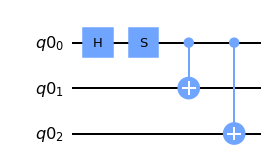

In [3]:
qr = QuantumRegister(3)
qc_3qx = QuantumCircuit(qr)

### your code goes here. ###

qc_3qx.h(0)
qc_3qx.s(0)
qc_3qx.cx(0,1)
qc_3qx.cx(0,2)

#######
qc_3qx.draw('mpl')

In [4]:
from qiskit.visualization import array_to_latex

state_ve = Statevector.from_instruction(qc_3qx)
array_to_latex(state_ve)

<IPython.core.display.Latex object>

<h4 style="font-size: 17px">&#128211;Step B. Plot the 3-qubit code state produced by the above circuit, <code>qc_3qx</code> on the qsphere to validate the encoding.  </h4>

- Check the [method](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html#qiskit.quantum_info.Statevector.from_instruction) which returns a statevector produced by a quantum circuit.
- Check [here](https://qiskit.org/documentation/tutorials/circuits/2_plotting_data_in_qiskit.html#Plot-State) to plot a quantum state on the qsphere.

The state displayed on the qshpere should match the 3-qubit code state for $|\psi\rangle$ upto a global phase.

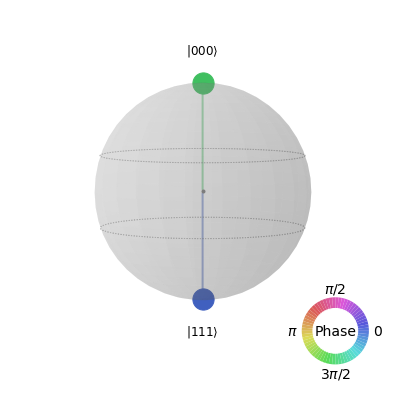

In [5]:
### your code goes here ###

state_ve = Statevector.from_instruction(qc_3qx)
plot_state_qsphere(state_ve)


<h4 style="font-size: 17px">Step C. Implement the parity check gates to detect and localize a single bit flip error on the code qubits.</h4>

Following operation will apply a single bit flip error on the code. Execute the cells below.

In [6]:
def apply_err(n, err):
    
    qc = QuantumCircuit(int(n), name='Error')
    which_qubit = np.random.randint(n)
    
    if err=='bit':
        qc.x(which_qubit)
    elif err=='phase':
        qc.z(which_qubit)
    else:
        pass
    
    err = qc.to_gate()
    
    return err, which_qubit

Error applied to qubit:  1


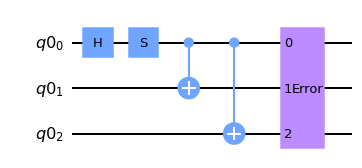

In [7]:
err, which_qubit = apply_err(3, 'bit')
print('Error applied to qubit: ', which_qubit)

qc_3qx.append(err,range(3))
qc_3qx.draw('mpl')

&#128211; Apply the parity check gates on the circuit `qc` with the extra registers for the appropriate number of auxiliary qubits and syndrome bits to locate a bit-flip ( X ) error on a single qubit in the code. ( For 3 qubit code, the number of syndrome bit states is equal to the number of possible single bit-flip error, including no error.)

In [8]:
# Execute this cell to add the extra registers

k = int(input('number of auxiliary qubits ( / syndrome bits): '))
ar = QuantumRegister(k, 'auxiliary')
cr = ClassicalRegister(k, 'syndrome')
qc_3qx.add_register(ar)
qc_3qx.add_register(cr)

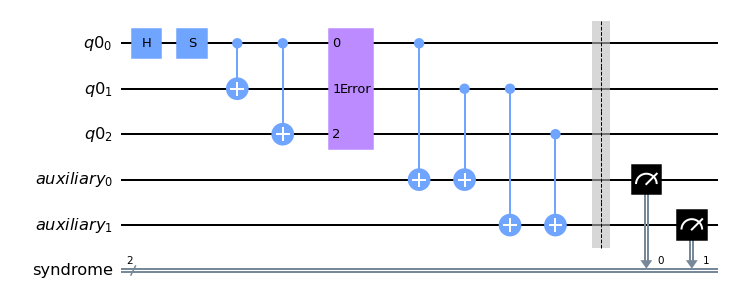

In [9]:
# Apply the parity check gates and measure the parities on the syndrome bits to localize a single bit-flip ( X ) error on the code.

### your code goes here. ###

qc_3qx.draw('mpl')

qc_3qx.cx(qr[0], ar[0])
qc_3qx.cx(qr[1], ar[0])
qc_3qx.cx(qr[1], ar[1])
qc_3qx.cx(qr[2], ar[1])
qc_3qx.barrier()
qc_3qx.measure(ar, cr)

######

qc_3qx.draw('mpl')

<h4 style="font-size: 17px">&#128211;Step D. Complete the dictionary in the following cell to make the syndrome look-up table for all single bit-flip errors on the three qubit code.</h4>

The key of the dictionary is a two-bit string for the syndrome and the values reprent the corresponding a single qubit error gates with the appropriate qubit indicies on the code circuit.

In [10]:
#### complete the dictionary ###

table_syndrome = {'00': 'I[0]I[1]I[2]', '01':'I[0]I[1]X[2]',
                  '10': 'X[0]I[1]I[2]', '11':'I[0]X[1]I[2]'}

######
print(table_syndrome)

{'00': 'I[0]I[1]I[2]', '01': 'I[0]I[1]X[2]', '10': 'X[0]I[1]I[2]', '11': 'I[0]X[1]I[2]'}


Run the following cell to execute the circuit `qc_xerr` on `aer_simulator`.

In [11]:
qc_3qx_trans = transpile(qc_3qx, sim)
syndrome = sim.run(qc_3qx_trans, shots=1, memory=True).result().get_memory()
print(syndrome)

['11']


<h4 style="font-size: 17px">&#128211;Step E. Find the single bit-error and two bit-error based on the measured syndrome bits and check your answer with the value of the variable, <code>which_qubit</code>.</h4>

Run the following cell. 

In [12]:
your_answer = input('Enter the index of the code qubit that underwent bit-flip error: ')
print('\n')
print(which_qubit == int(your_answer))



True


<h4 style="font-size: 17px">Step F. Identify the logical $X$ ( $X_{L}$ ) and logical $Z$ ( $Z_{L}$ ) operators for the three qubit bit flip code.</h4>

&#128211; Find the logical $X$, $X_{L}$, for three qubit bit flip code where $X_{L}|000\rangle = |111\rangle$. Construct a circuit to perform $X_{L}|0\rangle_{L}$ and simulate it to check if the state produced by the circuit is $|1\rangle_{L}$, where the logical code word basis states, $|0\rangle_{L}$ and $|1\rangle_{L}$, are encoded as $|0\rangle_{L} = |000\rangle, ~ |1\rangle_{L}=|111\rangle$ . 

In [84]:
### your code goes here ###
def get_logical_x():
    qr_xl = QuantumRegister(3, 'qubit')
    ar_xl = QuantumRegister(2, 'auxiliary')
    sr_xl = ClassicalRegister(2, 'syndrome')
    
    qc_xl = QuantumCircuit(qr_xl, ar_xl, sr_xl)
    qc_xl.x(range(3))
    
    qc_xl.cx([qr_xl[0], qr_xl[1]], [ar_xl[0], ar_xl[0]])
    qc_xl.cx([qr_xl[1], qr_xl[2]], [ar_xl[1], ar_xl[1]])
    
    qc_xl.barrier()
    qc_xl.measure(ar_xl, sr_xl)
    
    # correct errors
    qc_xl.x(qr_xl[2]).c_if(sr_xl, 2)
    qc_xl.x(qr_xl[0]).c_if(sr_xl, 1)
    qc_xl.x(qr_xl[1]).c_if(sr_xl, 3)

    return qc_xl

logical_x = get_logical_x()

bits_out = sim.run(logical_x, shots=1, memory=True).result().get_memory()
print(bits_out)

['00']


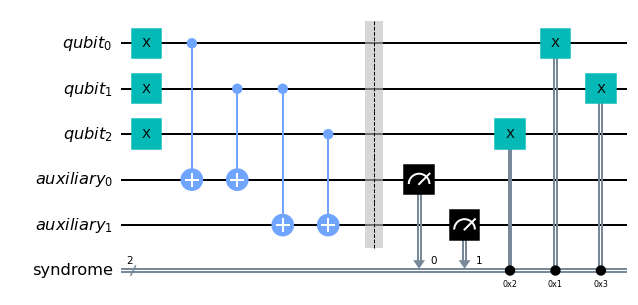

In [85]:
logical_x.draw('mpl')

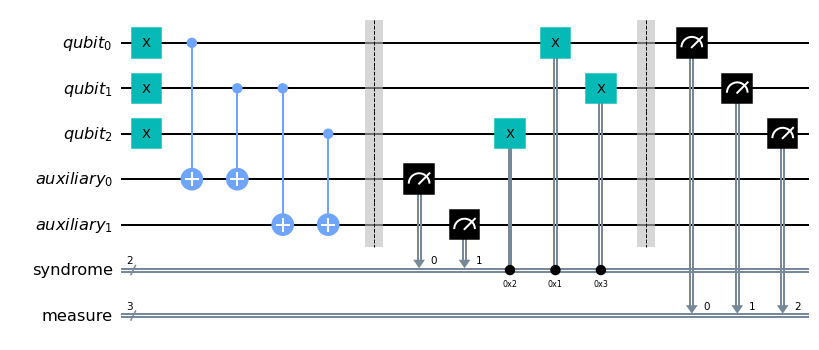

In [86]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram

aer_sim = Aer.get_backend('aer_simulator')

def get_noise(p_gate):
    error_gate1 = depolarizing_error(p_gate, 1)

    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_gate1, ["x"]) # single qubit gate error is applied to x gates

    return noise_model

noise_model = get_noise(0.01)

qr = QuantumRegister(3, 'qubit')
ar = QuantumRegister(2, 'auxiliary')
sr = ClassicalRegister(2, 'syndrome')
cr = ClassicalRegister(3, 'measure')
qc_000 = QuantumCircuit(qr, ar, sr, cr)
qc_000 = qc_000.compose(logical_x)
qc_000.barrier()
qc_000.measure(qr, cr)

qc_000.draw('mpl')

C:\Users\jmamczynska\Anaconda3\lib\site-packages\qiskit\utils\deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


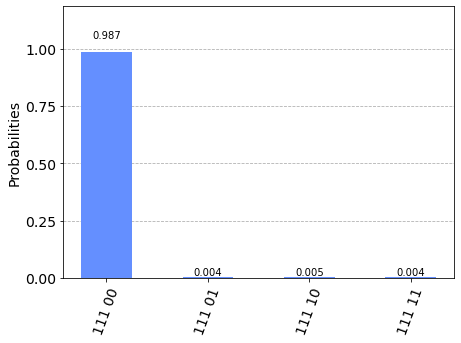

In [87]:
# run the circuit with the noise model and extract the counts
qobj = assemble(qc_000)
counts = aer_sim.run(qobj, noise_model=noise_model).result().get_counts()
plot_histogram(counts)

&#128211; Find the minimal weight encoded logical $Z$ ( there are four equivalent $Z_{L}$s. ) where $Z_{L}|+\rangle_{L} = |-\rangle_{L}$ and $|+\rangle_{L} = |0\rangle_{L} + |1\rangle_{L}, ~~ |-\rangle_{L} = |0\rangle_{L} - |1\rangle_{L}$ . What is the distance of the three qubit bit flip code? Can it detect or/and correct a single phase-flip ( Z ) error?

- weight: the weight of an operator is the number of qubits that it acts non-trivially on. ( E.g. $Z\otimes Z\otimes I$ has weight 2. )
- distance of a code: the minimum number of errors that will change one logical code word basis state to another or the maximum number of errors that can be detected.

**Your answer :** 



<h3 style="font-size: 20px">2. Construct a circuit that encodes one qubit state into 3-qubit code states and can locate a single phase-flip ( Z ) error through parity check.</h3>

<h4 style="font-size: 17px">&#128211;Step A. Create a circuit to encode the state $|\psi\rangle = \frac{1}{\sqrt{2}}(|0\rangle + i|1\rangle)$ into a 3-qubit code to protect it from one phase-flip ( Z ) error.</h4>

Here, the logical code word basis states, $|0\rangle_{L}$ and $|1\rangle_{L}$, are encoded as, $|0\rangle_{L} = |+++\rangle$ and $|1\rangle_{L} = |---\rangle$.

In [10]:
qc_3qz = QuantumCircuit(3)

### your code goes here. ###





########

qc_3qz.draw('mpl')

<h4 style="font-size: 17px">&#128211;Step B. Implement the parity check gates to detect and localize a single phase flip error on the code qubits.</h4>

Extra registers need to be added on the circuit for the auxiliary qubits and syndrome bits.

In [11]:
err, which_qubit = apply_err(3, 'phase')
qc_3qz.append(err, range(3))

### your code goes here ###











##########
qc_3qz.draw('mpl')


Excute the cell below to run the circuit `qc_zerr` on `aer_simulator`.

In [12]:
qc_3qz_trans = transpile(qc_3qz, sim)
syndrome = sim.run(qc_3qz_trans, shots=1, memory=True).result().get_memory()
print(syndrome)

<h4 style="font-size: 17px">&#128211;Step C. Find the single phase-error based on the measured syndrome bits and check your answer with the value of the variable, <code>which_qubit</code>.</h4>

In [13]:
your_answer = input('Enter the index of the code qubit that underwent phase-flip error: ')
print('\n')
print(which_qubit == int(your_answer))

<h2 style="font-size:24px;"> Part 2: Repetition code as a stabilizer code </h2>

<br>
<div style="background: #E8E7EB; border-radius: 5px;
-moz-border-radius: 5px;">
  <p style="background: #800080;
            border-radius: 5px 5px 0px 0px;
            padding: 10px 0px 10px 10px;
            font-size:18px;
            color:white;
            "><b>Goal</b></p>
    <p style=" padding: 0px 0px 10px 10px;
              font-size:16px;"> Stabilizer formalism defines Quantum Error Correcting Codes ( QECC ) by the set of operators that stabilize the logical code word states, instead of its state vectors. Interpreting quantum error correcting codes in terms of its stabilizers is beneficial since the decription of QECC is more concise and encoded logical operators can be obtained systematically. In the part 2 of this lab, we re-construct the repetition code as a stabilizer code to understand this new method.</p>
</div>

<h3 style="font-size: 20px">&#128211; 1. Find the two independent stablizer operators for the 3 qubit code states, $|000\rangle,~ |111\rangle$.</h3>

- The stabilizer operator $S$ of a n-qubit state $|\psi\rangle$ is the set of n-qubit Pauli operators that satisfy $S|\psi\rangle = |\psi\rangle$.

**Your answer :**

<h3 style="font-size: 20px"> 2. Construct a Quantum Phase Estimation ( QPE ) circuit to produce the eigenvalues for one of the stablizer, $I\otimes Z\otimes Z$.</h3>

<h4 style="font-size: 17px">&#128211;Step A. What are the eigenvalues of the operator $I\otimes Z \otimes Z$? Determine the minimum number of counting qubits needed in QPE circuit to estimate the eigenvalue accurately.</h4>

In [14]:
## Your answer goes here
t = int(input('The number of counting qubit: '))

<h4 style="font-size: 17px">&#128211;Step B. Complete the following code to build the QPE circuit. </h4>

Note: The QPE circuit essentially performs the projective measurement of the operator $I\otimes Z\otimes Z$ on the $|\psi\rangle = |0\rangle \otimes |0\rangle \otimes|+\rangle$.

In [15]:
qc0 = QuantumCircuit(t+3, 1)

qc0.h(-1)
qc0.barrier()

## your code goes here ##





######

qc0.measure(0, 0)
qc0.draw('mpl')

In [16]:
counts_qc0 = sim.run(qc0, shots=8192).result().get_counts()
plot_histogram(counts_qc0)

<h4 style="font-size: 17px">&#128211;Step C. Using the circuit identities, convert QPE part of the above circuit <code>qc0</code> to the one with only CNOT gates.</h4>

In [17]:
qc1 = QuantumCircuit(t+3, 1)

qc1.h(-1)
qc1.barrier()

## your code goes here ##




######

qc1.measure(0, 0)
qc1.draw('mpl')

In [18]:
counts_qc1 = sim.run(qc1, shots=8192).result().get_counts()
plot_histogram(counts_qc1)

<h4 style="font-size: 17px"> Summary </h4>

An error correcting code can be defined as an independent set of stabilizers and the errors are dectected by the measurement outcomes of this set of stabilizers.

Here, in part2 of this lab, we checked that there are two indepndent stabilizers for the three qubit repetition code, and measuring a stabilizer is equivalent to checking a parity. Therefore, to obtain set of syndromes for a single bit error detection with the three qubit repetition code, the circuit for encoding an arbitrary single qubit state and measuring two stabilizers has the folllowing structure.

![](image/L8_qec.png)